In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')

%matplotlib inline

In [3]:
house = pd.read_csv('data/california_housing.csv')

In [4]:
house.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
house.corr(method='pearson')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

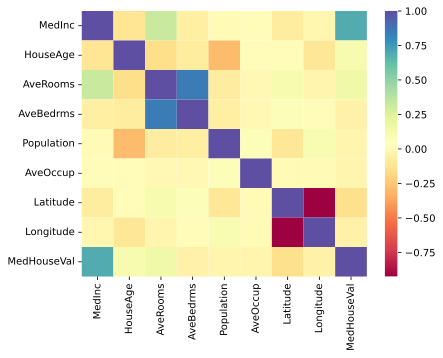

In [6]:
sns.heatmap(house.corr(), cmap = 'Spectral')

<Axes: >

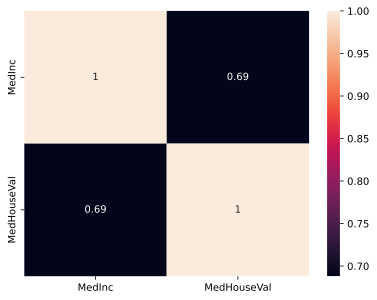

In [7]:
sns.heatmap(house[['MedInc', 'MedHouseVal']].corr(), annot=True)

In [8]:
median_income = house[['MedInc']][:30]
median_house_value = house[['MedHouseVal']][:30]

### **using `statsmodel.formula.api`**

In [9]:
import statsmodels.formula.api as smf

house_subset = house.iloc[:30]
model = smf.ols('MedHouseVal ~ MedInc', data=house_subset).fit()
model.params

Intercept    0.655791
MedInc       0.444476
dtype: float64

In [10]:
X_predict = pd.DataFrame({'MedInc':[8.56, 10.3, 6.98]})
predictions = model.predict(X_predict)

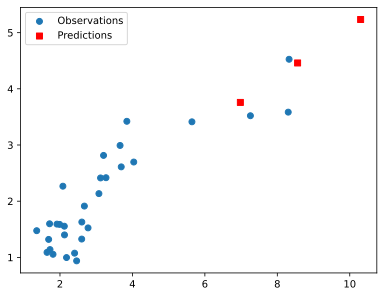

In [11]:
plt.scatter(median_income, median_house_value)
plt.scatter(X_predict, predictions, marker='s', color = 'red')
plt.legend(['Observations', 'Predictions'])
plt.show()

In [12]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     90.12
Date:                Sun, 04 May 2025   Prob (F-statistic):           3.00e-10
Time:                        13:34:35   Log-Likelihood:                -18.889
No. Observations:                  30   AIC:                             41.78
Df Residuals:                      28   BIC:                             44.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6558      0.172      3.819      0.0

#### **using `statsmodel.api`**

In [13]:
import statsmodels.api as sm

X = median_income
y = median_house_value
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.params

const     0.655791
MedInc    0.444476
dtype: float64

In [14]:
X_predict = [8.56, 10.3, 6.98]

In [15]:
X_predict = sm.add_constant(X_predict)
predictions = model.predict(X_predict)

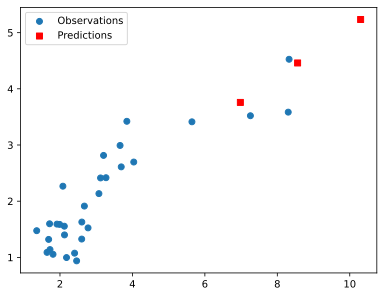

In [16]:
plt.scatter(median_income, median_house_value)
plt.scatter(X_predict[:, 1], predictions, marker='s', color = 'red')
plt.legend(['Observations', 'Predictions'])
plt.show()

In [17]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     90.12
Date:                Sun, 04 May 2025   Prob (F-statistic):           3.00e-10
Time:                        13:34:36   Log-Likelihood:                -18.889
No. Observations:                  30   AIC:                             41.78
Df Residuals:                      28   BIC:                             44.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6558      0.172      3.819      0.0

#### **using sklearn**

In [18]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(median_income, median_house_value)

LinearRegression()

c:\Users\arjit\projects\ml-study\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


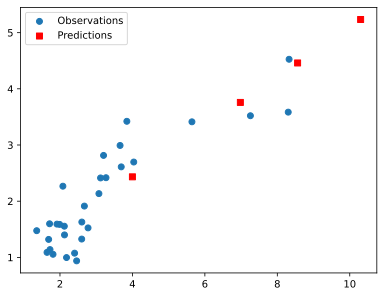

In [19]:
X_predict = np.array([8.56, 10.3, 6.98, 4]).reshape(-1, 1)
predictions = reg.predict(X_predict)
plt.scatter(median_income, median_house_value)
plt.scatter(X_predict, predictions, marker='s', color = 'red')
plt.legend(['Observations', 'Predictions'])
plt.show()

In [20]:
from sklearn.metrics import root_mean_squared_error

y_pred = model.fittedvalues
y_actual = house['MedHouseVal'].iloc[:30]

rmse = root_mean_squared_error(y_actual, y_pred)
rmse

0.4541672064392096